# Analisis exploratorio de datos (aka E.D.A) 

## Conjunto de datos a explorar: `auctions`

In [21]:
#Imports
import pandas as pd
import numpy as np

from IPython.display import display, Markdown as md
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de los datos
> Tomamos como precondicion que el campo `date` es una fecha del tipo de dato `datetime[64]`

In [22]:
 auctions = pd.read_csv("../data/auctions.csv.gzip", compression='gzip', parse_dates=["date"])

Observamos el esquema del conjunto de datos

In [23]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 GB


## Tratamiento de los tipos de datos

### Valores nulos
Observamos los valores nulos

In [24]:
auctions.isna().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

#### `auction_type_id`

`auction_type_id` es una columna que solo contiene valores nulos `NaN`, toma tipo de dato `float64` por la representacion interna que tiene pandas de los `NaN` ó `Not a Number` por lo tanto se la descarta esta columna del conjunto de datos

In [25]:
auctions.drop(columns=['auction_type_id'], inplace=True)

In [26]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        int64
date           datetime64[ns]
device_id      int64
platform       int64
ref_type_id    int64
source_id      int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 895.9 MB


### Tipos de datos
Ahora observaremos el tipo de dato que tiene cada una de las restantes columnas


#### `country`

In [27]:
auctions["country"].head()

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
Name: country, dtype: int64

In [28]:
auctions["country"].unique()

array([6333597102633388268])

La columna `country` en todas sus filas repite el valor `6333597102633388268`, se procede a eliminar la columna.

In [29]:
auctions.drop(columns=['country'], inplace=True)

In [30]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int64
ref_type_id    int64
source_id      int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 746.6 MB


#### `device_id`

In [31]:
auctions['device_id']
auctions['device_id'].unique()
len(auctions['device_id'].unique())

206977

> No se pueden tomar acciones sobre el atributo `device_id`

#### `platform`

In [32]:
auctions['platform'].head()

0    1
1    1
2    1
3    1
4    1
Name: platform, dtype: int64

> El atributo `platform` no parece contener valores que requieran un tipo de dato `int64`, se procede a convertirlo en un `int8`

In [33]:
auctions['platform'] = pd.to_numeric(auctions['platform'], downcast='integer')

In [34]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int64
source_id      int64
dtypes: datetime64[ns](1), int64(3), int8(1)
memory usage: 615.9 MB


#### `ref_type_id`

In [35]:
auctions['ref_type_id'].head()

0    1
1    1
2    1
3    1
4    1
Name: ref_type_id, dtype: int64

In [36]:
auctions['ref_type_id'].describe()

count    1.957132e+07
mean     2.235326e+00
std      2.426093e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      7.000000e+00
Name: ref_type_id, dtype: float64

> Todo parece indicar que el atributo `ref_type_id` no requieran un tipo de dato `int64`, se procede a convertirlo en un `int8`

In [44]:
#auctions['ref_type_id'] = pd.to_numeric(auctions['ref_type_id'], downcast='integer')
#Se utiliza 'astype' solamente a fines practicos y no porque haya alguna diferencia real.
auctions['ref_type_id'] = auctions['ref_type_id'].astype(np.int8)

In [45]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int8
source_id      int64
dtypes: datetime64[ns](1), int64(2), int8(2)
memory usage: 485.3 MB


#### `source_id`

In [46]:
auctions['source_id'].head()

0    0
1    0
2    0
3    0
4    0
Name: source_id, dtype: int64

In [47]:
auctions['source_id'].unique()

array([0, 5, 6, 1, 2])

> Por lo observado en el atributo `source_id` se procede a la conversion de tipo `int8`

In [48]:
auctions['source_id'] = auctions['source_id'].astype(np.int8)

In [49]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: datetime64[ns](1), int64(1), int8(3)
memory usage: 354.6 MB


In [50]:
display(auctions.head())

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [57]:
days = auctions['date'].apply(lambda x: x.date())
counts_by_day = days.value_counts().sort_index()

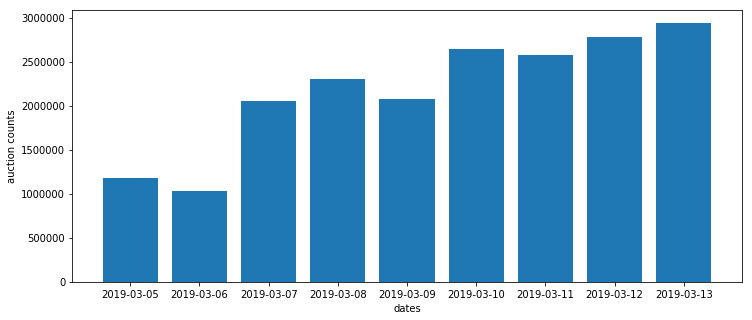

In [67]:
# Config
%matplotlib inline
#pd.options.display.max_columns = None
#plt.figure(figsize=(10, 10));
fig, ax = plt.subplots(figsize=(12,5))

ax.set_xlabel('dates')
ax.set_ylabel('auction counts')

plt.bar(counts_by_day.index, counts_by_day.values)
plt.show()